In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

$f(x) = 0.5*x + 1.0 + 0.4 * \epsilon$

In [2]:
f = lambda x: 0.5 * x + 1.0
x_train = np.linspace(-1, 1, 50)
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))

In [3]:
x_train

array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
       -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
       -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
       -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
       -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
        0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
        0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
        0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
        0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
        0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ])

In [4]:
y_train

array([0.7195254 , 0.80648391, 0.78192168, 0.77917776, 0.75109457,
       0.86039846, 0.79748386, 0.99956634, 1.04873041, 0.83705008,
       1.02077165, 0.93604776, 0.97211578, 1.13554478, 0.81412871,
       0.84097417, 0.83461797, 1.17998671, 1.17860964, 1.23575996,
       1.2996106 , 1.24823485, 1.13357134, 1.28159943, 1.03710569,
       1.26617249, 1.08795356, 1.42888797, 1.2801679 , 1.25770151,
       1.21806714, 1.44234654, 1.33552136, 1.40084297, 1.20139347,
       1.46133991, 1.47953217, 1.50187564, 1.65300944, 1.56864649,
       1.46012969, 1.51154748, 1.63619534, 1.40164121, 1.66466587,
       1.68662249, 1.52292853, 1.51075419, 1.60576318, 1.64548431])

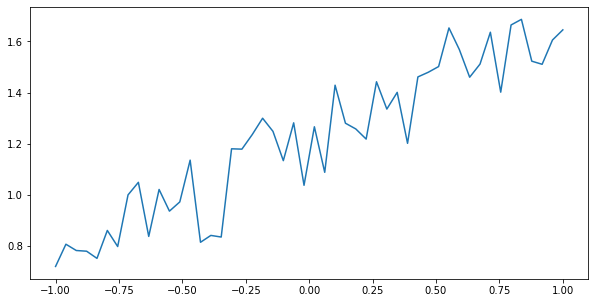

In [5]:
plt.figure(figsize = (10, 5))
plt.plot(x_train, y_train, '-')

---

### Stochastic Gradient Descent

In [6]:
batch_size = 5
learning_rate = 0.1
epochs = 10

paths = []
batch_loss = []
w0 = np.array([4.0, -1.0])  #initial value
search_direction = np.zeros_like(w0)

In [7]:
# 데이터 셔플링
np.random.seed(0)
idx = np.arange(len(x_train))
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [8]:
np.random.shuffle(idx)
shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]

In [9]:
idx

array([28, 11, 10, 41,  2, 27, 38, 31, 22,  4, 33, 35, 26, 34, 18,  7, 14,
       45, 48, 29, 15, 30, 32, 16, 42, 20, 43,  8, 13, 25,  5, 17, 40, 49,
        1, 12, 37, 24,  6, 23, 36, 21, 19,  9, 39, 46,  3,  0, 47, 44])

In [10]:
shuffled_x_train

array([ 0.14285714, -0.55102041, -0.59183673,  0.67346939, -0.91836735,
        0.10204082,  0.55102041,  0.26530612, -0.10204082, -0.83673469,
        0.34693878,  0.42857143,  0.06122449,  0.3877551 , -0.26530612,
       -0.71428571, -0.42857143,  0.83673469,  0.95918367,  0.18367347,
       -0.3877551 ,  0.2244898 ,  0.30612245, -0.34693878,  0.71428571,
       -0.18367347,  0.75510204, -0.67346939, -0.46938776,  0.02040816,
       -0.79591837, -0.30612245,  0.63265306,  1.        , -0.95918367,
       -0.51020408,  0.51020408, -0.02040816, -0.75510204, -0.06122449,
        0.46938776, -0.14285714, -0.2244898 , -0.63265306,  0.59183673,
        0.87755102, -0.87755102, -1.        ,  0.91836735,  0.79591837])

----

- loss

$loss = 0.5 * 1/{N} \sum_{}^{N}(w_{0}x_{i} + w_{1} - y_{i})^{2}$

* loss_grad

$\nabla_{w_{0}} loss = 1/N \sum^{N}(w_{0}x_{i} + w_{1} - y_{i})*x_{i}$

$\nabla_{w_{1}} loss = 1/N \sum^{N}(w_{0}x_{i} + w_{1} - y_{i})$

In [11]:
def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5 * (w[0] * x_set[i] + w[1] - y_set[i])**2
        
    return val/N

def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = w[0] * x_set[i] + w[1] - y_set[i]
        val += er * np.array([x_set[i], 1.0])
    return val/N

In [12]:
def generate_batches(batch_size, features, labels):
    outout_batches = []
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
    return outout_batches

In [13]:
generate_batches(25, shuffled_x_train, shuffled_y_train)

[[array([ 0.14285714, -0.55102041, -0.59183673,  0.67346939, -0.91836735,
          0.10204082,  0.55102041,  0.26530612, -0.10204082, -0.83673469,
          0.34693878,  0.42857143,  0.06122449,  0.3877551 , -0.26530612,
         -0.71428571, -0.42857143,  0.83673469,  0.95918367,  0.18367347,
         -0.3877551 ,  0.2244898 ,  0.30612245, -0.34693878,  0.71428571]),
  array([1.2801679 , 0.93604776, 1.02077165, 1.51154748, 0.78192168,
         1.42888797, 1.65300944, 1.44234654, 1.13357134, 0.75109457,
         1.40084297, 1.46133991, 1.08795356, 1.20139347, 1.17860964,
         0.99956634, 0.81412871, 1.68662249, 1.60576318, 1.25770151,
         0.84097417, 1.21806714, 1.33552136, 0.83461797, 1.63619534])],
 [array([-0.18367347,  0.75510204, -0.67346939, -0.46938776,  0.02040816,
         -0.79591837, -0.30612245,  0.63265306,  1.        , -0.95918367,
         -0.51020408,  0.51020408, -0.02040816, -0.75510204, -0.06122449,
          0.46938776, -0.14285714, -0.2244898 , -0.6326530

-----

$w^{(k+1)} = w^{(k)} - \eta \nabla_{w}E(w^{(k)})$

In [14]:
# algorithm
for epoch in range(epochs): 
    # 미니배치 생성
    for x_batch, y_batch in generate_batches(batch_size, 
                                            shuffled_x_train,
                                            shuffled_y_train):
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        
        # 미니배치에서 그래디언트 계산
        grad = loss_grad(w0, x_batch, y_batch)
        search_direction = -grad #탐색 방향 설정
        dw = learning_rate * search_direction
        w0 = w0 + dw
        
    print('{0:02d}\t{1:}\t{2:5.4f}'.format(epoch, w0, 
                                          loss(w0, x_train, y_train)))

00	[2.93239439 0.43695696]	1.3702
01	[2.18816577 0.93919432]	0.5627
02	[1.66823355 1.11539635]	0.2645
03	[1.30460388 1.17767633]	0.1305
04	[1.05015104 1.2000109 ]	0.0665
05	[0.87204751 1.20824198]	0.0353
06	[0.74736772 1.21142604]	0.0201
07	[0.66008091 1.21275738]	0.0127
08	[0.59897044 1.21337683]	0.0091
09	[0.55618561 1.21370166]	0.0073


----

In [15]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

In [16]:
w0 = np.linspace(-5, 7, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
loss_w = w0 * 0

for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i, j], w1[i, j]])
        loss_w[i, j] = loss(wij, x_train, y_train)

(-5.0, 7.0, -2.0, 5.0)

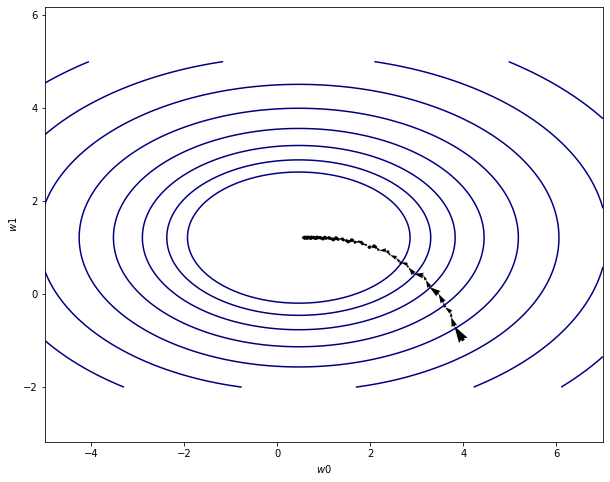

In [17]:
paths = np.array(paths)
paths = np.array(np.matrix(paths)).T

fig, ax = plt.subplots(figsize = (10, 8))
ax.contour(w0, w1, loss_w, levels = np.logspace(0, 5, 35), 
           cmap = plt.cm.jet)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1],
          scale_units = 'xy', angles = 'xy', scale = 1, color = 'k')
ax.set_xlabel('$w0$')
ax.set_ylabel('$w1$')
ax.axis('equal')